### Supervised KNN

Distance from K Neighbours
- data sets are visibly separated and marked e.g. there are two groups of points - blue and green
- the purpose is to classify new (red) sample to one of the groups
- "K" parameter defines how many nearest neighbours are going to be considered: for K=3 we receive 2 blue and 1 green neighbour so new sample will probably be blue and it is classified this way

<br>

### Unsupervised KNN in Anomaly Detection
- We have a group of samples. To simplify, we marked them as blue.
- We focus on a sample (marked as red) far from the group and the value of parameter K. For example for K=2 we count mean of distances to two nearest neighbours. 
- Then for one of the samples belonging to the group and the same K we count mean distance from neighbours.
- The point, which mean distance from neighbours is greater is the more anomalous point. If we assume a treshold, above which we mark point as anomalous then we can achieve classification.

<br>

### DANGER!
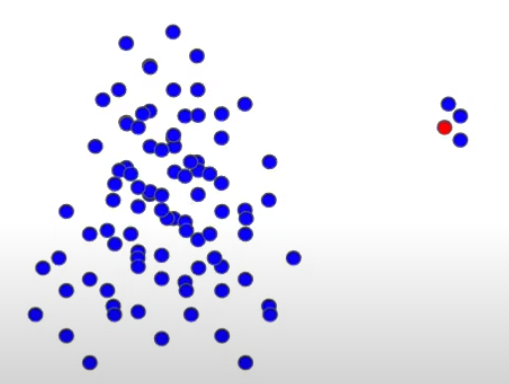



- For above example, when we assume K=2 for marked point, the mean distance to neighbours will be simular to mean distance between neighbours for group on left hand side of the photo.
- In practice we operate on different K values.

### Computational Complexity
- Finding neighbours isn't trivial. When we have many points computional complexity increases because for the designated point we count distances to every neighbour. Next, based on results, we choose K nearest neighbours. 
- In praktice we limit search spaces to nearest neighbours to not calculate every distance in the set.
- One solution is to divide data to regions based on a median. Next we divide regions to sub-regions based on median etc. up to designated point. Then points "know" in which regions they are and they look for neighbours only there. Of course this method can give wrong results when sample is on a border of the region but it is still effective method in many cases.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

old = pd.read_csv('/content/drive/MyDrive/Resources/submission.csv')
old.head()

df = old[['Accordion', 'Acoustic_guitar']].copy()
df.rename(columns={'Accordion':'0', 'Acoustic_guitar':'1'}, inplace=True)
# inplace=True -> overwrite original df
df.head()

,0,1
0,2.923243e-09,7.161557e-08
1,1.996648e-04,2.096502e-03
2,1.197935e-04,6.463896e-06
3,1.181921e-11,4.253022e-08
4,9.370017e-05,2.245676e-05


In [107]:
df_values = df.values
print(f"df_values type is {type(df_values)}")
row_index = 3
print(df_values[:,1]) # Retrieve all values from column with id=1

print([(index, row) for index, row in enumerate(df_values)][0])

df_values type is <class 'numpy.ndarray'>
[7.16155739e-08 2.09650211e-03 6.46389572e-06 ... 8.94915871e-03
 4.11234113e-09 2.32881677e-04]
(0, array([2.92324276e-09, 7.16155739e-08]))


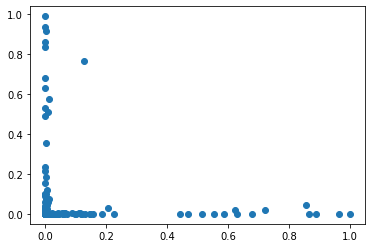

In [66]:
plt.scatter(df_values[:,0], df_values[:,1])

In [90]:
tmp = [num for num in range(100)]
matrix = [tmp, tmp[::-1]]
print(type(matrix))
print(matrix[:][0])
print(matrix[:][1]) 

list_with_tuples = [(1,2), (3,4)]
print(type(list_with_tuples))

<class 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
<class 'list'>


In [126]:
# Possible KNN algorithms
# 'brute' - will use brute-force search
# 'auto' - will attempt to decide the most appropriate algorithm based on the values passed to fit method
# 'kd_tree'
# 'ball_tree;

K_parameter = 3
neighbours = NearestNeighbors(n_neighbors=K_parameter)
neighbours.fit(df_values) # Unsupervised method takes only 'x'


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [127]:
neighbours.kneighbors(df_values)

# 1st array = distances (in the first column we only have zeros because we count distances from samples to themselves, second and third columns contain distances to neighbours)
# 2nd array = indexes (in the first column we have indexes of examined samples and neighbours' indexes)

(array([[0.00000000e+00, 4.39602992e-09, 4.83458776e-09],
        [0.00000000e+00, 1.02098905e-04, 1.17735655e-04],
        [0.00000000e+00, 5.29444182e-06, 5.68089436e-06],
        ...,
        [0.00000000e+00, 1.55972066e-04, 5.62056673e-04],
        [0.00000000e+00, 1.04464293e-08, 3.55733054e-08],
        [0.00000000e+00, 6.05904514e-05, 6.37295947e-05]]),
 array([[   0,  644,   83],
        [   1,  114,  467],
        [   2, 1049, 1087],
        ...,
        [1117,  548,  604],
        [1118,  388, 1038],
        [1119,  228,  569]]))

1120
[0.00000000e+00 6.05904514e-05 6.37295947e-05]


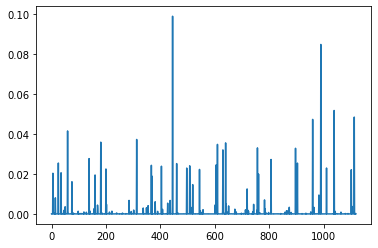

In [118]:
distances, indexes = neighbours.kneighbors(df_values)
plt.plot(distances.mean(axis=1))
# We show points' indexes on X axis and mean distances from points to its neighbours on Y axis
# We can see anomalous points which lies far from its neighbours

# We check how many points we have
print(len(indexes))

# Our samples have indexes from 0 to len(indexes)-1
print(distances[len(indexes)-1])

In [121]:
anomaly_threshold = 0.04
abn_index = np.where(distances.mean(axis=1) > anomaly_threshold)
print(abn_index)

(array([  59,  445,  960,  990, 1039, 1113]),)


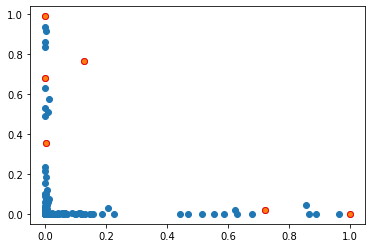

In [128]:
# Marking to red abnormal points/indexes
plt.scatter(df_values[:,0], df_values[:,1])
plt.scatter(df_values[abn_index,0], df_values[abn_index,1], edgecolors='r')


# Optimalization relies on proper selection of parameter K

### Unsupervised KNN can be used in Time Series Data

In [133]:
# First, we unpack zip which contains 3 datasets
import os
directory_name = "TimeSeriesDS"
parent_dir = "/content/drive/MyDrive/Resources"
tsds_path = os.path.join(parent_dir, directory_name)
#os.mkdir(tsds_path)
print("Directory %s created for Time Series Data Set" % directory_name)

Directory TimeSeriesDS created for Time Series Data Set


In [145]:
from zipfile import ZipFile
#with ZipFile('occupancy_data.zip', 'r') as zipObj:
  #zipObj.extractall(tsds_path)

%cd /content/drive/MyDrive/Resources/TimeSeriesDS/
%ls


from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(tsds_path) if isfile(join(tsds_path, f))]
print(onlyfiles)
print(f"File {[filename for filename in onlyfiles]}")

# Change cwd to the directory where files have been unziped
os.chdir(tsds_path)
%pwd

/content/drive/MyDrive/Resources/TimeSeriesDS
datatest2.txt  datatest.txt  datatraining.txt
['datatest.txt', 'datatest2.txt', 'datatraining.txt']
File ['datatest.txt', 'datatest2.txt', 'datatraining.txt']


'/content/drive/MyDrive/Resources/TimeSeriesDS'

In [156]:
original = pd.read_csv(os.path.join(tsds_path, onlyfiles[0]))
newname = onlyfiles[0].split(".")[0]+".csv"
original.to_csv(os.path.join(tsds_path, newname), index=None)
original.head()

df = original[['date', 'Temperature', 'Light', 'CO2']].copy()
df.rename(columns={'date':'time', 'Temperature':'sensor1', 'Light':'sensor2', 'CO2':'sensor3'}, inplace=True)
df.head(3)

,time,sensor1,sensor2,sensor3
140,2015-02-02 14:19:00,23.700,585.200000,749.200000
141,2015-02-02 14:19:59,23.718,578.400000,760.400000
142,2015-02-02 14:21:00,23.730,572.666667,769.666667


In [160]:
for col in df.columns: print(col)
print("\n")

# We remove 140, 141 etc. from data

datetime_column = df['time']
print(datetime_column)

time
sensor1
sensor2
sensor3


140     2015-02-02 14:19:00
141     2015-02-02 14:19:59
142     2015-02-02 14:21:00
143     2015-02-02 14:22:00
144     2015-02-02 14:23:00
               ...         
2800    2015-02-04 10:38:59
2801    2015-02-04 10:40:00
2802    2015-02-04 10:40:59
2803    2015-02-04 10:41:59
2804    2015-02-04 10:43:00
Name: time, Length: 2665, dtype: object


In [166]:
print(type(datetime_column.values))
datetime_values = datetime_column.values
print(datetime_values[0])

<class 'numpy.ndarray'>
2015-02-02 14:19:00


In [172]:
df.index = pd.to_datetime(df.index)
print(type(df.index))

df.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,time,sensor1,sensor2,sensor3
1970-01-01 00:00:00.000000140,2015-02-02 14:19:00,23.7000,585.200000,749.200000
1970-01-01 00:00:00.000000141,2015-02-02 14:19:59,23.7180,578.400000,760.400000
1970-01-01 00:00:00.000000142,2015-02-02 14:21:00,23.7300,572.666667,769.666667
1970-01-01 00:00:00.000000143,2015-02-02 14:22:00,23.7225,493.750000,774.750000
1970-01-01 00:00:00.000000144,2015-02-02 14:23:00,23.7540,488.600000,779.000000


In [184]:


from sklearn import preprocessing

# Solution of error: # Could not convert 'time' string column to float
def convert(data):
  number = preprocessing.LabelEncoder()
  data['time'] = number.fit_transform(data['time'])
  return data

df = convert(df)
df_values = df.values
nei = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(x)


distances, indexes =  nei.kneighbors(df_values)


ValueError: ignored

In [175]:
df['time']

1970-01-01 00:00:00.000000140    2015-02-02 14:19:00
1970-01-01 00:00:00.000000141    2015-02-02 14:19:59
1970-01-01 00:00:00.000000142    2015-02-02 14:21:00
1970-01-01 00:00:00.000000143    2015-02-02 14:22:00
1970-01-01 00:00:00.000000144    2015-02-02 14:23:00
                                        ...         
1970-01-01 00:00:00.000002800    2015-02-04 10:38:59
1970-01-01 00:00:00.000002801    2015-02-04 10:40:00
1970-01-01 00:00:00.000002802    2015-02-04 10:40:59
1970-01-01 00:00:00.000002803    2015-02-04 10:41:59
1970-01-01 00:00:00.000002804    2015-02-04 10:43:00
Name: time, Length: 2665, dtype: object

In [16]:
%cd /content/drive/MyDrive/Resources/submission.csv

/content/drive/MyDrive/Resources


In [17]:
%ls

'Isolation Forest.ipynb'  '[Unsupervised KNN] Anomaly Detection.ipynb'
 submission.csv
